# PTC-PyORBIT PS Long-Term-Tracking

### This script:
- Plots the Poincare section using dumped bunch files
- Plots the Poincare section via the user defined ParticleOutputDictionary::PrintAllParticles
- Checks that the two methods provide identical data
- Compares the two PTC versions used

In [1]:
import glob
import imageio
import pickle
import pandas as pd

In [2]:
%run '../../00_Scripts/helper_functions.py'

### Load bunch output files

In [3]:
newPTC_source_dir =  './newPTC/H_21/bunch_output/'
bunch_filename = 'mainbunch'
newPTC_files = glob.glob(newPTC_source_dir + bunch_filename + '*.mat')
newPTC_files.sort()

In [4]:
newPTC_files

['./newPTC/H_21/bunch_output/mainbunch_-000001.mat',
 './newPTC/H_21/bunch_output/mainbunch_000000.mat',
 './newPTC/H_21/bunch_output/mainbunch_000001.mat',
 './newPTC/H_21/bunch_output/mainbunch_000002.mat',
 './newPTC/H_21/bunch_output/mainbunch_000003.mat',
 './newPTC/H_21/bunch_output/mainbunch_000004.mat',
 './newPTC/H_21/bunch_output/mainbunch_000005.mat',
 './newPTC/H_21/bunch_output/mainbunch_000006.mat',
 './newPTC/H_21/bunch_output/mainbunch_000007.mat',
 './newPTC/H_21/bunch_output/mainbunch_000008.mat',
 './newPTC/H_21/bunch_output/mainbunch_000009.mat',
 './newPTC/H_21/bunch_output/mainbunch_000010.mat',
 './newPTC/H_21/bunch_output/mainbunch_000011.mat',
 './newPTC/H_21/bunch_output/mainbunch_000012.mat',
 './newPTC/H_21/bunch_output/mainbunch_000013.mat',
 './newPTC/H_21/bunch_output/mainbunch_000014.mat',
 './newPTC/H_21/bunch_output/mainbunch_000015.mat',
 './newPTC/H_21/bunch_output/mainbunch_000016.mat',
 './newPTC/H_21/bunch_output/mainbunch_000017.mat',
 './newPTC/

In [5]:
oldPTC_source_dir =  './oldPTC/H_21/bunch_output/'
bunch_filename = 'mainbunch'
oldPTC_files = glob.glob(oldPTC_source_dir + bunch_filename + '*.mat')
oldPTC_files.sort()

In [6]:
oldPTC_files

['./oldPTC/H_21/bunch_output/mainbunch_-000001.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000000.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000001.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000002.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000003.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000004.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000005.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000006.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000007.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000008.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000009.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000010.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000011.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000012.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000013.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000014.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000015.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000016.mat',
 './oldPTC/H_21/bunch_output/mainbunch_000017.mat',
 './oldPTC/

In [7]:
def bunch_file_to_dataframe(file, input_dataframe=None):
    column_names = ['turn','id','x','xp','y','yp','dE','z']

    if input_dataframe is None:
        df = pd.DataFrame({'turn': pd.Series([], dtype='int'),
                   'id': pd.Series([], dtype='int'),
                   'x': pd.Series([], dtype='float'),
                   'xp': pd.Series([], dtype='float'),
                   'y': pd.Series([], dtype='float'),
                   'yp': pd.Series([], dtype='float'),
                   'z': pd.Series([], dtype='float'),
                   'dE': pd.Series([], dtype='float')})
        
    else:        
        df = input_dataframe
        if ('turn' or 'id' or 'x' or 'xp' or 'y' or 'yp' or 'dE' or 'z') not in df.columns:
            print('bunch_file_to_dataframe::ERROR: Input dataframe does not contain expected headings')
            exit(0)
    
    particles = sio.loadmat(file, squeeze_me=True, struct_as_record=False)['particles']
    n_part = len(particles.x)
    test = file[-11]
    if test == '-':
        turn = int(-1)
    else:
        turn = int(file[-10:-4])
    
    if turn not in df.turn.values:
        for i in range(0,n_part,1):  
            # Note we put this into a dataframe initially to maintain datatypes
            data = pd.DataFrame(
            {'turn': int(turn),
            'id': int(i),
            'x' : particles.x[i],
            'xp': particles.xp[i],
            'y' : particles.y[i],
            'yp': particles.yp[i],
            'z' : particles.z[i],
            'dE': particles.dE[i]},
            index=[0])
            df = df.append(data, ignore_index=True)
    
    return df

In [8]:
def bunch_files_to_dataframe(file_list, input_dataframe=None):
    
    if input_dataframe== None:
        df = pd.DataFrame({'turn': pd.Series([], dtype='int'),
                   'id': pd.Series([], dtype='int'),
                   'x': pd.Series([], dtype='float'),
                   'xp': pd.Series([], dtype='float'),
                   'y': pd.Series([], dtype='float'),
                   'yp': pd.Series([], dtype='float'),
                   'z': pd.Series([], dtype='float'),
                   'dE': pd.Series([], dtype='float')})
        
    else:
        df = input_dataframe
        if 'turn' or 'id' or 'x' or 'xp' or 'y' or 'yp' or 'dE' or 'z' not in df.columns:
            print('bunch_files_to_dataframe::ERROR: Input dataframe does not contain expected headings')
            exit(0)
        
    for file in file_list:
        df = bunch_file_to_dataframe(file, df)
    
    return df

### Note the below operations may take a few hours for >1000 files

In [9]:
df_oldPTC = bunch_files_to_dataframe(oldPTC_files)

In [10]:
df_newPTC = bunch_files_to_dataframe(newPTC_files)

In [11]:
df_newPTC.dtypes

turn      int64
id        int64
x       float64
xp      float64
y       float64
yp      float64
z       float64
dE      float64
dtype: object

In [12]:
-1 in df_newPTC.turn.values

True

In [13]:
df_oldPTC

,turn,id,x,xp,y,yp,z,dE
0,-1,0,0.000000,0.000000,0.0,0.0,-0.000000,0.000000
1,-1,1,0.001490,0.000000,0.0,0.0,-0.000000,0.000000
2,-1,2,0.002980,0.000000,0.0,0.0,-0.000000,0.000000
3,-1,3,0.004469,0.000000,0.0,0.0,-0.000000,0.000000
4,-1,4,0.005959,0.000000,0.0,0.0,-0.000000,0.000000
...,...,...,...,...,...,...,...,...
1050016,49999,16,-0.021646,-0.000424,0.0,0.0,-0.030133,0.000002
1050017,49999,17,-0.000677,-0.001134,0.0,0.0,-0.036140,0.000002
1050018,49999,18,0.000132,-0.001203,0.0,0.0,-0.040374,0.000003
1050019,49999,19,-0.024465,-0.000612,0.0,0.0,-0.042783,0.000003


### Load ParticleOutputDictionary files

In [14]:
newPTC_Poincare = pd.read_table('./newPTC/H_21/Poincare.dat')
newPTC_Poincare = newPTC_Poincare.rename(columns={"#ParticleID": "id", "x[m]": "x", "y[m]": "y", "z[m]": "z", "dE[GeV]": "dE"})

In [15]:
oldPTC_Poincare = pd.read_table('./oldPTC/H_21/Poincare.dat')
oldPTC_Poincare = oldPTC_Poincare.rename(columns={"#ParticleID": "id", "x[m]": "x", "y[m]": "y", "z[m]": "z", "dE[GeV]": "dE"})

In [16]:
oldPTC_Poincare

,id,Turn,x,xp,y,yp,z,dE
0,0,-1,0.000000,0.000000,0.0,0.0,-0.000000,0.000000
1,0,0,-0.000000,-0.000000,0.0,0.0,-0.000000,-0.000000
2,0,1,-0.000000,0.000000,0.0,0.0,-0.000000,-0.000000
3,0,2,-0.000000,-0.000000,0.0,0.0,-0.000000,-0.000000
4,0,3,-0.000000,-0.000000,0.0,0.0,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...
1050016,20,49995,0.025425,0.000666,0.0,0.0,-0.041238,0.000003
1050017,20,49996,0.021347,-0.000960,0.0,0.0,-0.046831,0.000003
1050018,20,49997,-0.014918,-0.001139,0.0,0.0,-0.047906,0.000003
1050019,20,49998,-0.028747,0.000394,0.0,0.0,-0.043618,0.000003


In [17]:
newPTC_Poincare

,id,Turn,x,xp,y,yp,z,dE
0,0,-1,0.000000,0.000000,0.0,0.0,-0.000000,0.000000
1,0,0,-0.000000,-0.000000,0.0,0.0,-0.000000,-0.000000
2,0,1,-0.000000,0.000000,0.0,0.0,-0.000000,-0.000000
3,0,2,0.000000,0.000000,0.0,0.0,-0.000000,-0.000000
4,0,3,-0.000000,-0.000000,0.0,0.0,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...
1050016,20,49995,0.025425,0.000666,0.0,0.0,-0.041241,0.000003
1050017,20,49996,0.021347,-0.000960,0.0,0.0,-0.046834,0.000003
1050018,20,49997,-0.014919,-0.001139,0.0,0.0,-0.047909,0.000003
1050019,20,49998,-0.028747,0.000394,0.0,0.0,-0.043620,0.000003


### Define some global variables

In [18]:
main_title = 'PTC: PS Long Term Tracking'
n_macro = 21
save_folder = 'Plots'
make_directory(save_folder)

Successfully created the directory Plots


## Plot Poincare file 

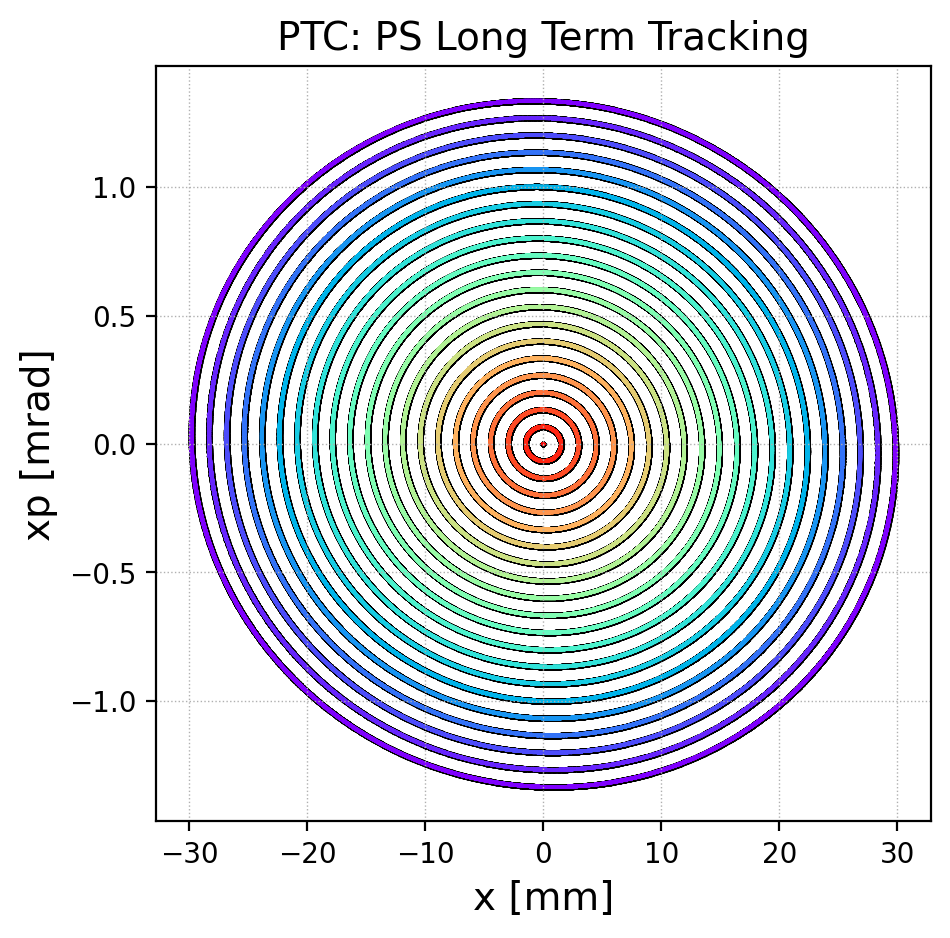

In [19]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(5., 5.))
ax1 = fig1.add_subplot(111)

tit = main_title
ax1.set_title(tit);

ax1.set_xlabel('x [mm]');
ax1.set_ylabel('xp [mrad]');

colors1 = cm.rainbow(np.linspace(0, 1, n_macro))
colors2 = cm.rainbow(np.linspace(1, 0, n_macro))

#ax1.scatter(newPTC_Poincare.x*1E3, newPTC_Poincare.xp*1E3, color=colors1[newPTC_Poincare.id], s=0.5, marker='o')
ax1.scatter(oldPTC_Poincare.x*1E3, oldPTC_Poincare.xp*1E3, color='k', s=0.8, marker='o')
ax1.scatter(newPTC_Poincare.x*1E3, newPTC_Poincare.xp*1E3, color=colors2[newPTC_Poincare.id], s=0.1, marker='o')
              
#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(which='major', ls = ':', lw = 0.5)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/PTC_PS_1E4_Turns_ParticleOutputDictionary.png'
plt.savefig(savename);

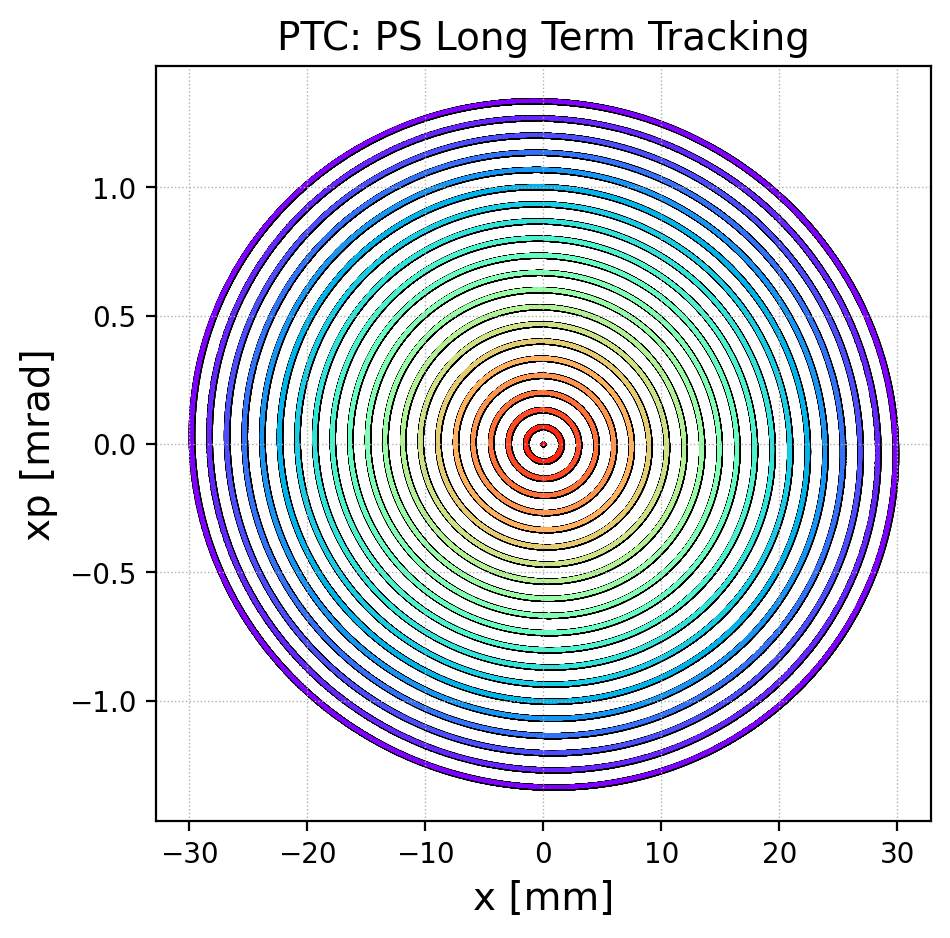

In [20]:
fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(5., 5.))
ax1 = fig1.add_subplot(111)

tit = main_title
ax1.set_title(tit);

ax1.set_xlabel('x [mm]');
ax1.set_ylabel('xp [mrad]');

colors1 = cm.rainbow(np.linspace(0, 1, n_macro))
colors2 = cm.rainbow(np.linspace(1, 0, n_macro))

#ax1.scatter(newPTC_Poincare.x*1E3, newPTC_Poincare.xp*1E3, color=colors1[newPTC_Poincare.id], s=0.5, marker='o')
ax1.scatter(df_oldPTC.x*1E3, df_oldPTC.xp*1E3, color='k', s=0.8, marker='o')
ax1.scatter(df_newPTC.x*1E3, df_newPTC.xp*1E3, color=colors2[df_newPTC.id], s=0.1, marker='o')
              
#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(which='major', ls = ':', lw = 0.5)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)


savename = save_folder +'/PTC_PS_1E4_Turns_BunchOutput.png'
plt.savefig(savename);